The National Transportation Safey Board (NTSB) aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. 

In [37]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
sns.set(style="dark")

In [39]:
events = pd.read_csv("data/events.txt")
aircraft = pd.read_csv("data/aircraft.txt")

In [40]:
country = pd.read_csv("data/Country.txt",names=['abbr','name'])
country.head()

,abbr,name
0,LI,Liberia
1,LO,Slovakia
2,LS,Liechtenstein
3,LT,Lesotho
4,LU,Luxembourg


Lets start by formatting some of the data


In [41]:
def format_year_or_month(x):
    if np.isnan(x):
        return 1
    return int(float(x))

def format_city(x):
    if not x:
        return "No City"
    return str(x).upper()

def format_midair(x):
    if str(x) == 'nan':
        return "N/A"
    return x  
    

events.ev_year = events.ev_year.apply(lambda x: format_year_or_month(x))
events.ev_city = events.ev_city.apply(lambda x: format_city(x))
events.mid_air = events.mid_air.apply(lambda x: format_midair(x))
min_year = events.ev_year.min()
max_year = events.ev_year.max()

In [42]:
events = events[ events.ev_year > 2000 ]

In [43]:
dff = events.groupby("ev_country").filter(lambda x: len(x) > 100)

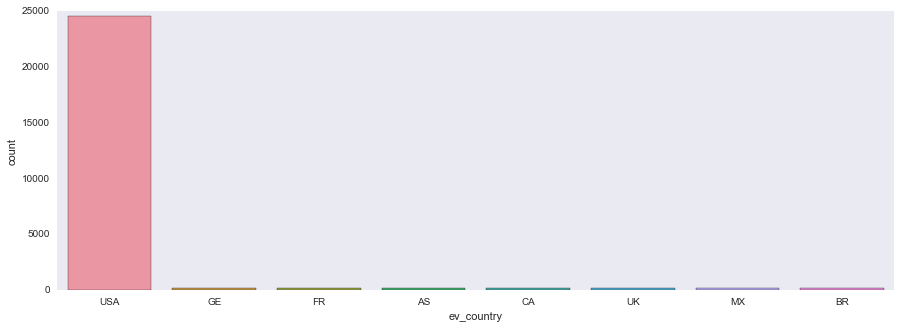

In [44]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="ev_country", data=dff)

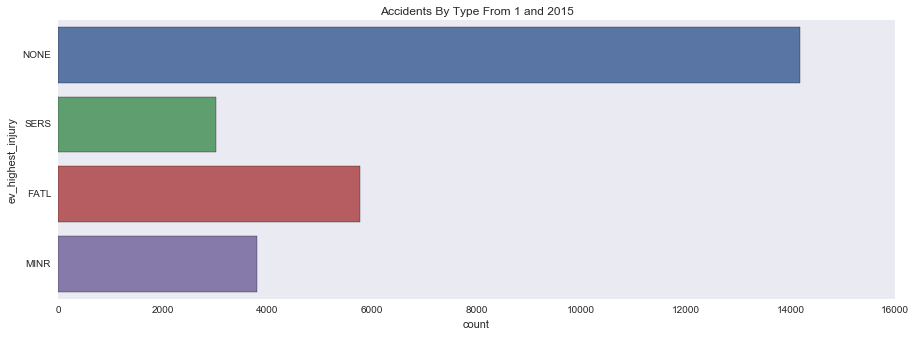

In [45]:
f, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(y="ev_highest_injury", data=events)
sns.plt.title('Accidents By Type From %s and %s' % (min_year, max_year));

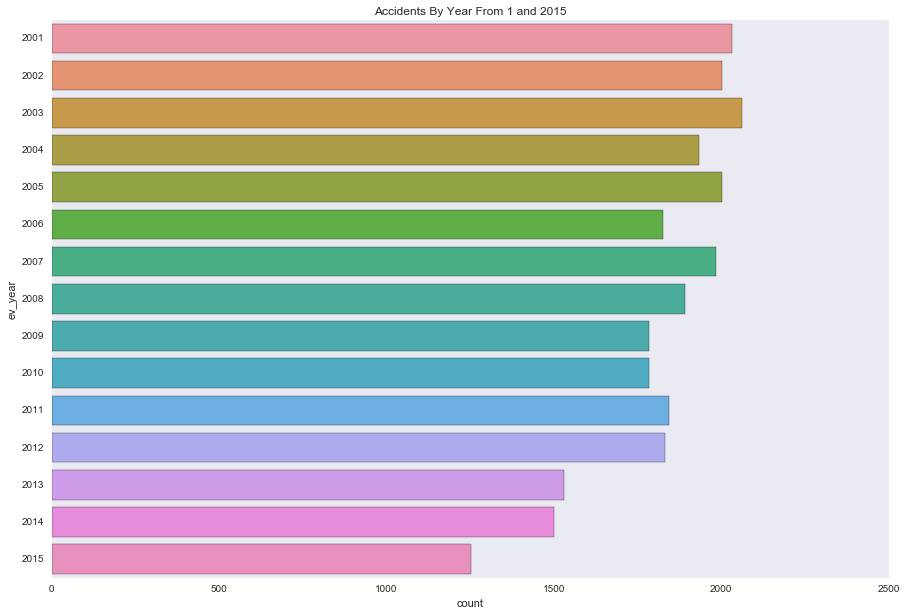

In [46]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(y="ev_year", data=events)
sns.plt.title('Accidents By Year From %s and %s' % (min_year, max_year));

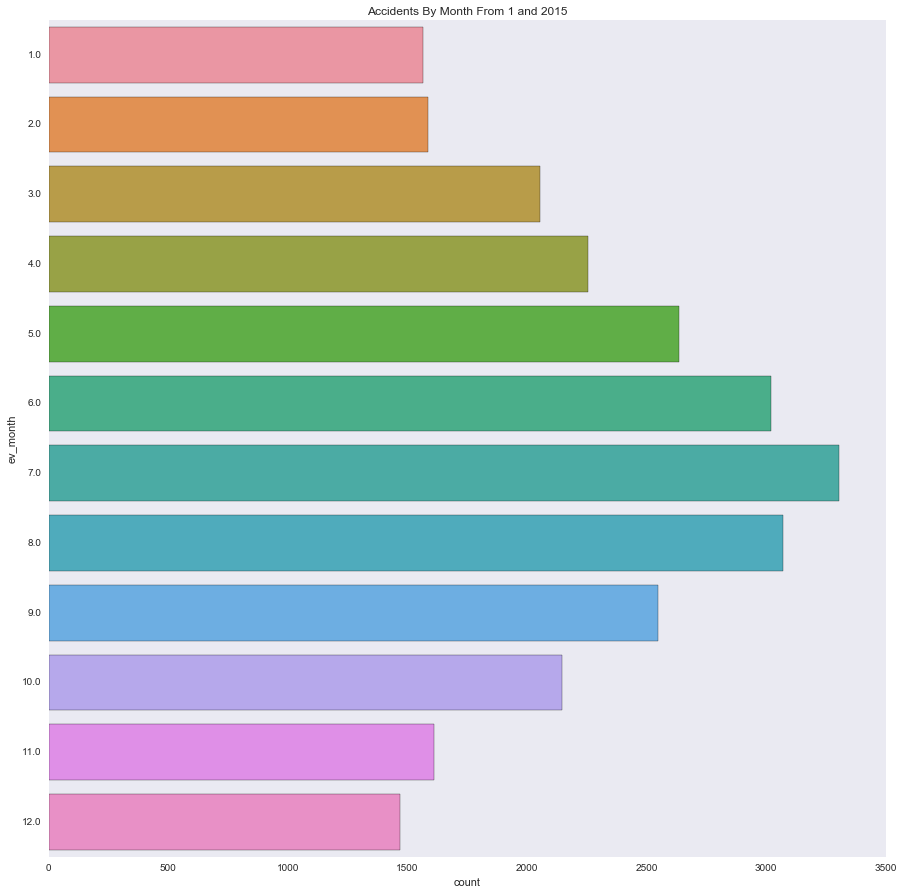

In [47]:
plt.figure(figsize=(15,15))
g = sns.countplot(y="ev_month", data=events)
sns.plt.title('Accidents By Month From %s and %s' % (min_year, max_year));

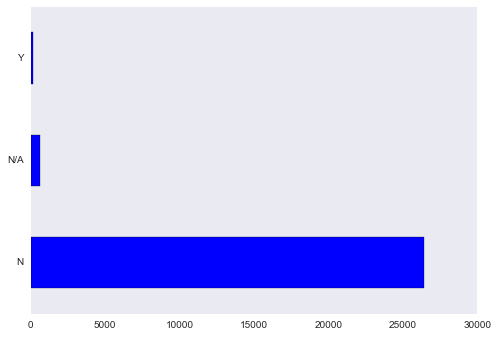

In [48]:
events.mid_air.value_counts().plot(kind='barh');

In [49]:
events_merged= pd.merge(events, aircraft, on='ev_id', how='outer')
events_merged = events_merged.dropna(subset=['owner_acft'], how='all')

In [50]:
events_merged.head(1)

,ev_id,ntsb_no_x,ev_type,ev_date,ev_dow,ev_time,ev_tmzn,ev_city,ev_state,ev_country,...,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,20010105X00043,CHI01LA061,ACC,1/1/2001 0:00:00,Mo,1245,EST,PORT HURON,MI,USA,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN


In [51]:
from IPython.core.display import HTML

def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [52]:
events_merged.head(1)

,ev_id,ntsb_no_x,ev_type,ev_date,ev_dow,ev_time,ev_tmzn,ev_city,ev_state,ev_country,...,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,20010105X00043,CHI01LA061,ACC,1/1/2001 0:00:00,Mo,1245,EST,PORT HURON,MI,USA,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN


In [55]:
southwest = events_merged[events_merged.owner_acft.str.contains("Southwest")]
united = events_merged[events_merged.owner_acft.str.contains("United")]

In [66]:
southwest[['owner_acft','regis_no','date_last_insp']]

,owner_acft,regis_no,date_last_insp
248,Southwest Airlines Company,N335SW,3/4/2001 0:00:00
939,Southwestern Gas Pipeline Inc.,N4834N,5/8/2001 0:00:00
1621,"Southwest Helicopters, Inc.",N911BB,NaN
4338,Central Air Southwest,N553RA,NaN
4733,Southwest Airlines Company,N343SW,5/13/2003 0:00:00
6503,Southwest Airlines Company,N448WN,4/12/2004 0:00:00
6882,Southwest Airlines Co,N757LV,5/25/2004 0:00:00
7731,Southwest Airlines Co ...,N601WN,7/10/2004 0:00:00
7809,Great Southwest Aviation Inc.,N849SP,7/2/2004 0:00:00
8015,"Great Southwest Aviation, Inc.",N849SP,12/1/2004 0:00:00
